In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
cancer_data = pd.read_csv('~/Mini-projetos/Breast Cancer/data/processed/cancer_data.csv').set_index('id').dropna(how='any', axis=0)
cancer_data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


# Verificando o balanceamento das classes

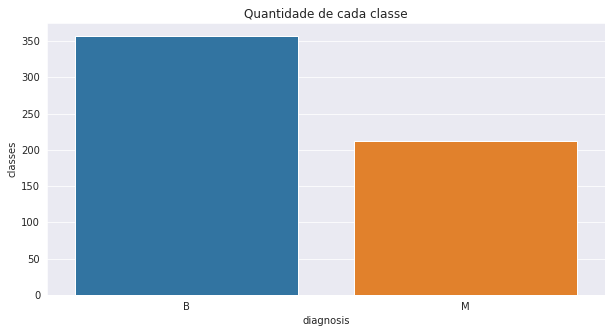

Porcentagem da classe B: 0.6274165202108963
Porcentagem da classe M: 0.37258347978910367


In [45]:
quantidade_de_classes = pd.DataFrame(cancer_data.groupby('diagnosis').size(), columns=['classes'])
plt.figure(figsize=(10,5))
sns.barplot(x=quantidade_de_classes.index, y='classes', data=quantidade_de_classes)
plt.title('Quantidade de cada classe')
plt.show()

print('Porcentagem da classe B: {}'.format((quantidade_de_classes.iloc[0]/(quantidade_de_classes.iloc[0]+quantidade_de_classes.iloc[1])).iloc[0]))
print('Porcentagem da classe M: {}'.format((quantidade_de_classes.iloc[1]/(quantidade_de_classes.iloc[0]+quantidade_de_classes.iloc[1])).iloc[0]))

# Utilizando PCA para reduzir a dimensionalidade do problema 

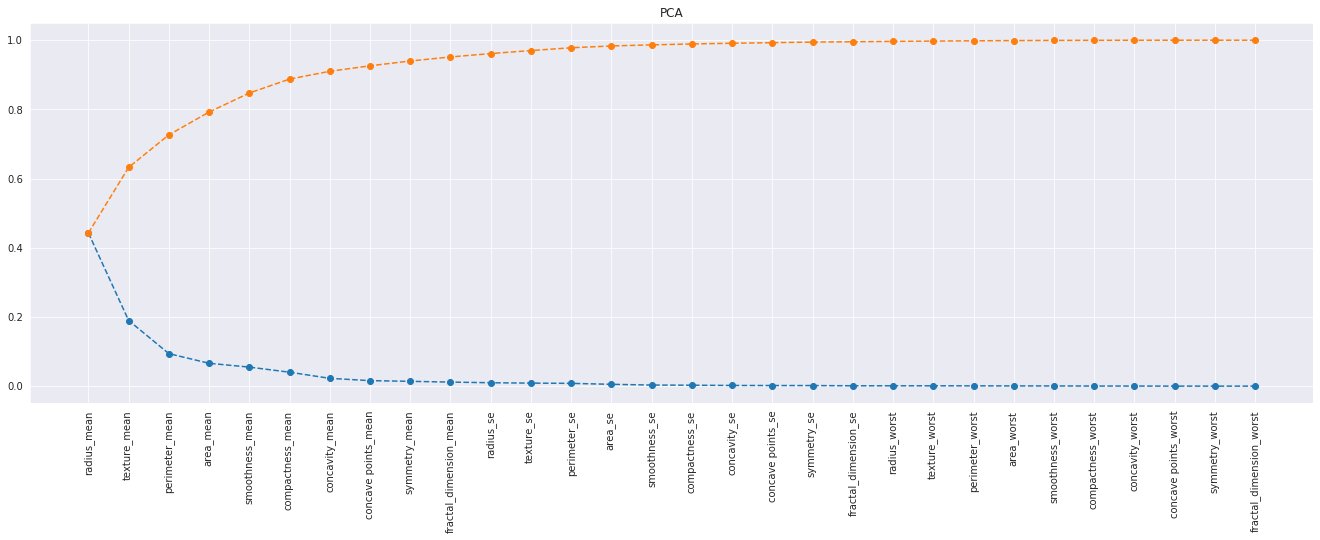

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [142]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(X=cancer_data[cancer_data.columns[1:]].values, y=cancer_data[cancer_data.columns[0]].values)
pca_trafo = PCA().fit(z_data);

plt.figure(figsize=(23,7))

plt.plot(cancer_data.columns[1:].tolist(), pca_trafo.explained_variance_ratio_, '--o')
plt.plot(cancer_data.columns[1:].tolist(), pca_trafo.explained_variance_ratio_.cumsum(), '--o')
plt.xticks(rotation=90)
plt.title('PCA')
plt.show()

feature_importance_labels = list(cancer_data.columns[1:])
feature_importance_values = list(pca_trafo.explained_variance_ratio_)

relevant_features = []
for label, value in zip(feature_importance_labels, feature_importance_values):
    if value > 0.01:
        relevant_features.append(label)
        
print(relevant_features)

# Utilizando apenas as features escolhidas no PCA

In [149]:
cancer_data[relevant_features].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


# Verificando quais dessas features são correlacionadas

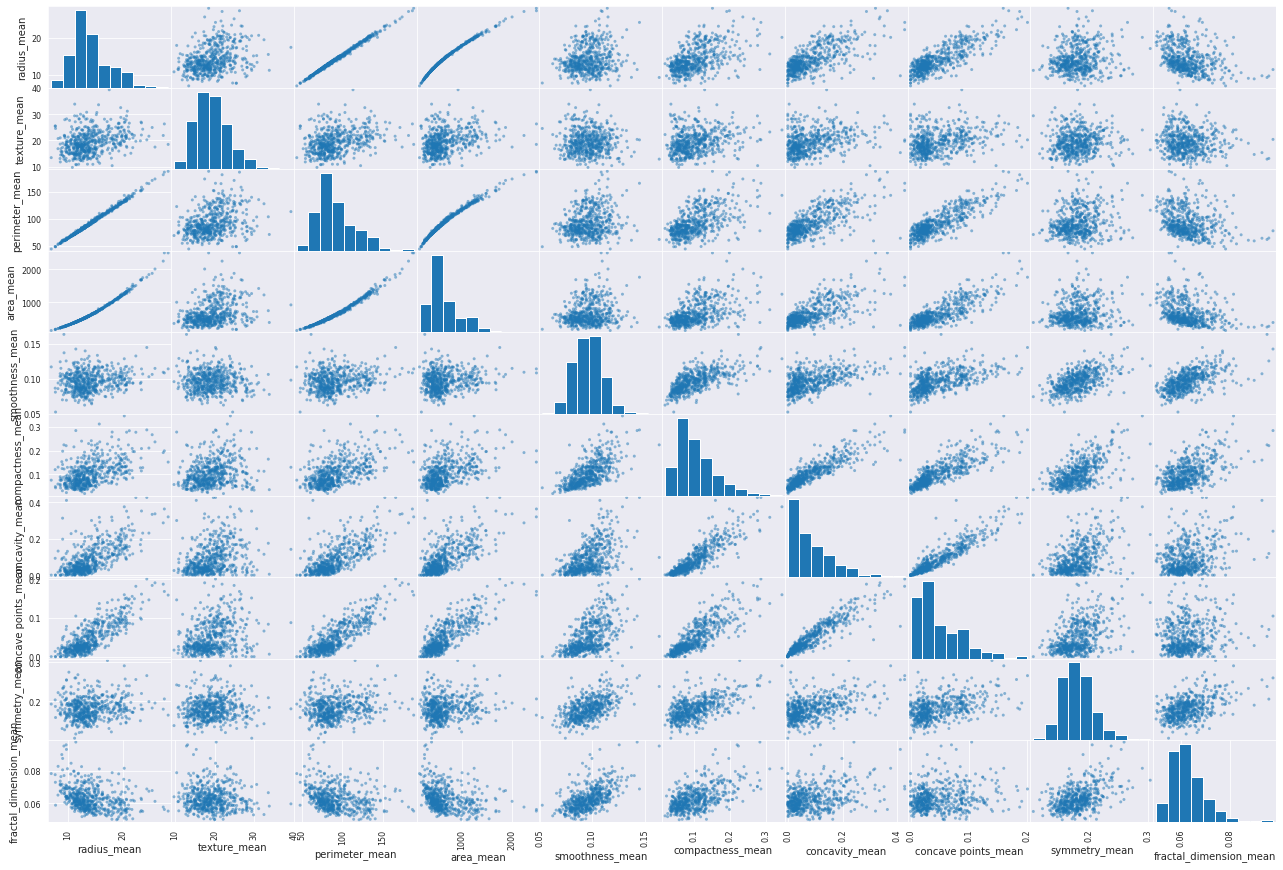

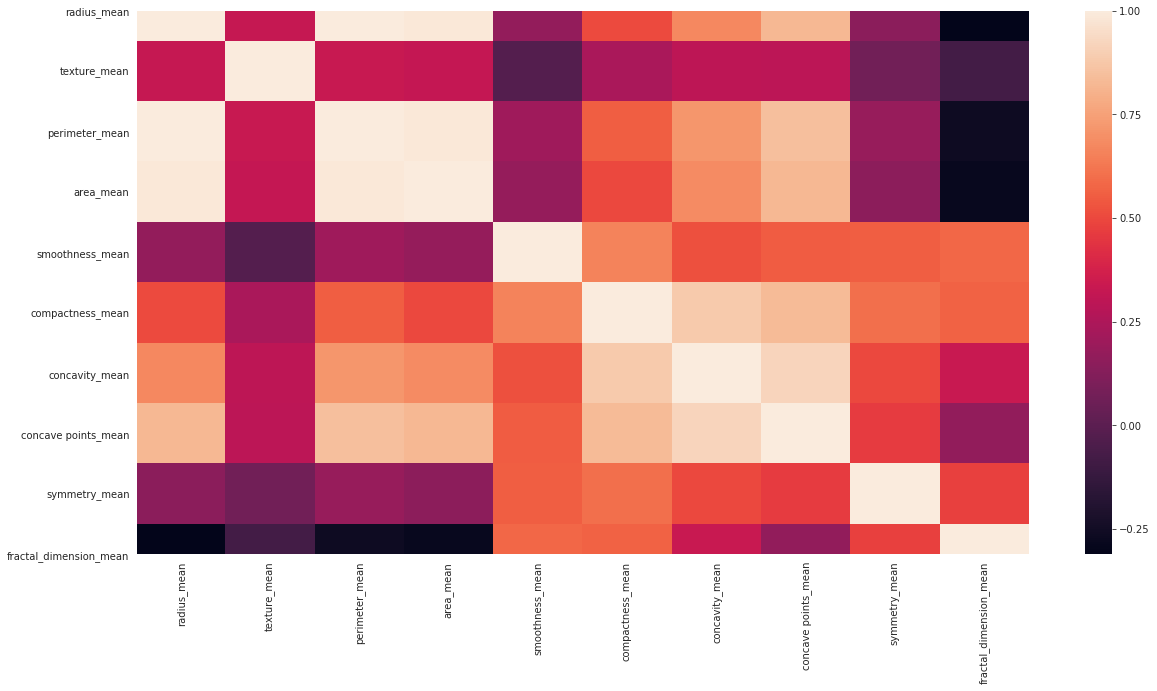

In [148]:
plt.figure(figsize=(20,10))
sns.heatmap(cancer_data[relevant_features].corr())
plt.show()

In [158]:
correlation_data = cancer_data[relevant_features].corr()
correlation_data[(correlation_data > 0.75) & (correlation_data < 1)]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,NaN,NaN,0.997855,0.987357,NaN,NaN,NaN,0.822529,NaN,NaN
texture_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,0.997855,NaN,NaN,0.986507,NaN,NaN,NaN,0.850977,NaN,NaN
area_mean,0.987357,NaN,0.986507,NaN,NaN,NaN,NaN,0.823269,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,0.883121,NaN,0.921391,NaN,NaN
concave points_mean,0.822529,NaN,0.850977,0.823269,NaN,0.831135,0.921391,NaN,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


dados que aparentam ser muito correlacionados: ['perimeter_mean', 'radius_mean', 'area_mean', 'concave points_mean']

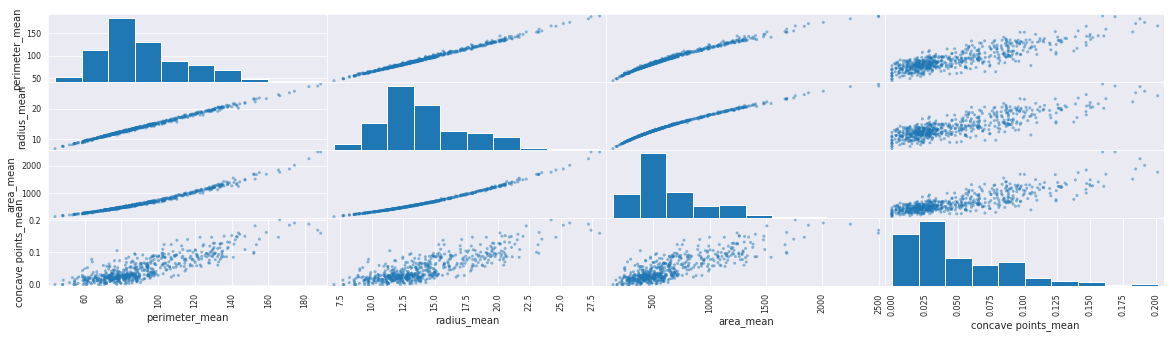

In [164]:
pd.plotting.scatter_matrix(cancer_data[['perimeter_mean', 'radius_mean', 'area_mean', 'concave points_mean']], figsize=(20,5))
plt.show()

Vamos manter apenas o 'radius_mean', e as colunas relevantes que serão utilizadas:

['diagnosis',
 'radius_mean',
 'texture_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'symmetry_mean',
 'fractal_dimension_mean']


In [172]:
features_with_most_relevance = cancer_data[relevant_features].drop(['perimeter_mean', 'area_mean', 'concave points_mean'], axis=1).columns.tolist()

In [175]:
cancer_data[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean']]

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,
842302,M,17.990,10.38,0.11840,0.27760,0.300100,0.2419,0.07871
842517,M,20.570,17.77,0.08474,0.07864,0.086900,0.1812,0.05667
84300903,M,19.690,21.25,0.10960,0.15990,0.197400,0.2069,0.05999
84348301,M,11.420,20.38,0.14250,0.28390,0.241400,0.2597,0.09744
84358402,M,20.290,14.34,0.10030,0.13280,0.198000,0.1809,0.05883
843786,M,12.450,15.70,0.12780,0.17000,0.157800,0.2087,0.07613
844359,M,18.250,19.98,0.09463,0.10900,0.112700,0.1794,0.05742
84458202,M,13.710,20.83,0.11890,0.16450,0.093660,0.2196,0.07451
844981,M,13.000,21.82,0.12730,0.19320,0.185900,0.2350,0.07389
